##***Time Series Analysis and Forecasting of Air Passenger Data Set***

In [ ]:
#Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/My Drive/Colab Notebooks/Time Series

In [ ]:
#importing the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline
rcParams['figure.figsize'] = 10,6

In [5]:
#loading the csv file
dataset=pd.read_csv('datasets_1057_1913_AirPassengers.csv')
dataset['Month'] = pd.to_datetime(dataset['Month'])
dataset          = dataset.set_index(['Month'])
dataset.head(6)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135


In [6]:
#renaming the column name
dataset.columns = ['Passengers']
dataset.head(6)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135


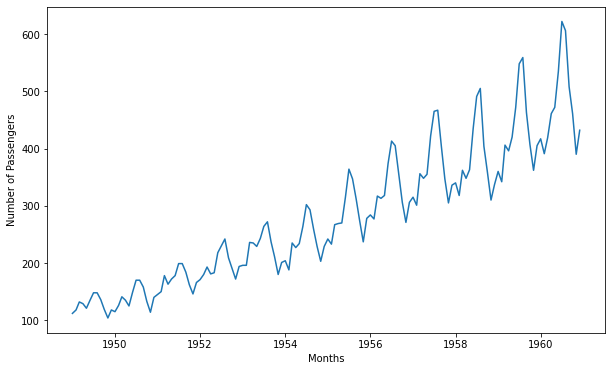

In [7]:
#plotting the time series
plt.xlabel('Months')
plt.ylabel('Number of Passengers')
plt.plot(dataset)
plt.show()

In [8]:
#calculating the rolling mean 
rolmean = dataset.rolling(window=12).mean()
rolmean.head(20)

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [9]:
#calculating the rolling standard deviation 
rolstd = dataset.rolling(window=12).std()
rolstd.head(20)

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


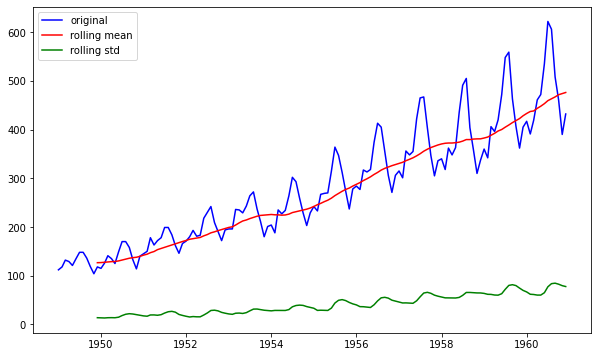

In [10]:
#plotting rolling stats with originial dataset
plt.plot(dataset,color='blue',label='original')
plt.plot(rolmean,color='red',label='rolling mean')
plt.plot(rolstd,color='green',label='rolling std')
plt.legend()
plt.show()

In [11]:
#testing for stationary nature of time series Data using the Dickey-fuller test
test_result = adfuller(dataset['Passengers'])
label       = ['Test Stat','P value','Lag Used','Number of observation used']
for val,label in zip(test_result,label):
  print(label, val)

Test Stat 0.815368879206047
P value 0.991880243437641
Lag Used 13
Number of observation used 130


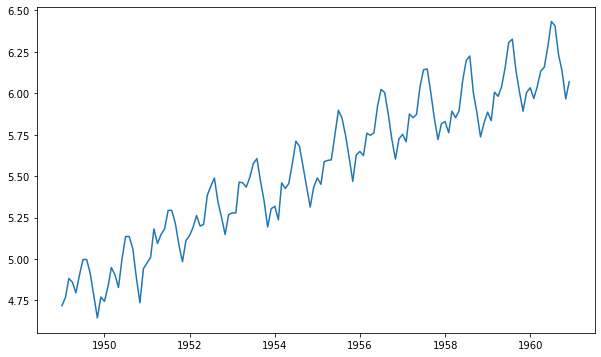

In [12]:
#taking log of all the values in the time series data
dataset_log = np.log(dataset)
plt.plot(dataset_log)
plt.show()

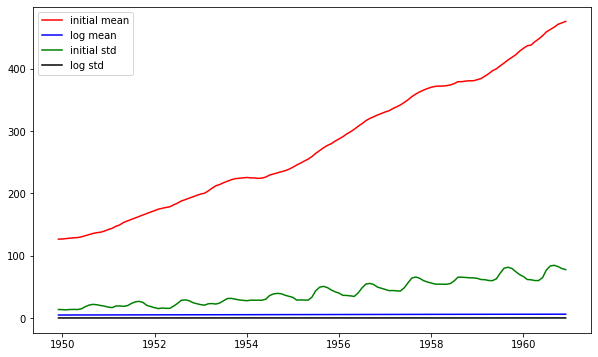

In [13]:
#plotting the moving average and moving standard deviation
rol_mean_log = dataset_log.rolling(window=12).mean()
rol_mean_std = dataset_log.rolling(window=12).std()
plt.plot(rolmean,color='red',label='initial mean')
plt.plot(rol_mean_log,color='blue',label='log mean')
plt.plot(rolstd,color='green',label='initial std')
plt.plot(rol_mean_std,color='black',label='log std')
plt.legend(loc='best')
plt.show()

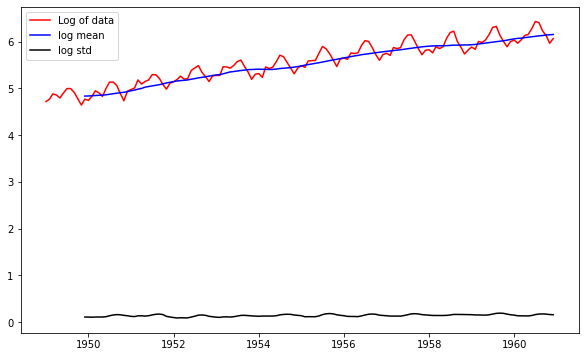

In [14]:
#plotting only the new ones
plt.plot(dataset_log,color='red',label='Log of data')
plt.plot(rol_mean_log,color='blue',label='log mean')
plt.plot(rol_mean_std,color='black',label='log std')
plt.legend(loc='best')
plt.show()

In [15]:
#creating another series from log of data
dataset_log_minus_avg = dataset_log - rol_mean_log
dataset_log_minus_avg.head(20)

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [16]:
#droping all the na values
dataset_log_minus_avg.dropna(inplace=True)
dataset_log_minus_avg.head(20)

,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


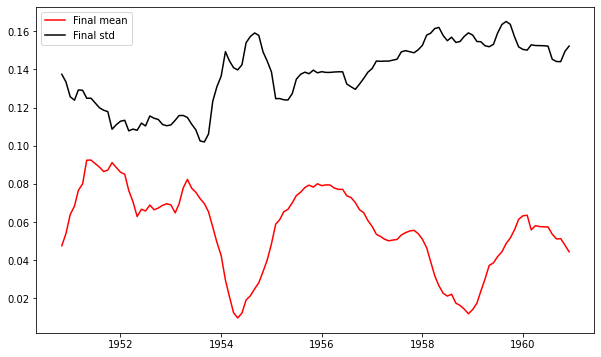

In [17]:
#plotting the moving average and moving standard deviation
rol_mean_log_minus = dataset_log_minus_avg.rolling(window=12).mean()
rol_mean_std_minus = dataset_log_minus_avg.rolling(window=12).std()
plt.plot(rol_mean_log_minus,color='red',label='Final mean')
plt.plot(rol_mean_std_minus,color='black',label='Final std')
plt.legend(loc='best')
plt.show()

In [18]:
#testing for stationary nature of time series Data using the Dickey-fuller test
test_result = adfuller(dataset_log_minus_avg['Passengers'])
label       = ['Test Stat','P value','Lag Used','Number of observation used']
for val,label in zip(test_result,label):
  print(label, val)

Test Stat -3.162907991300857
P value 0.022234630001243903
Lag Used 13
Number of observation used 119


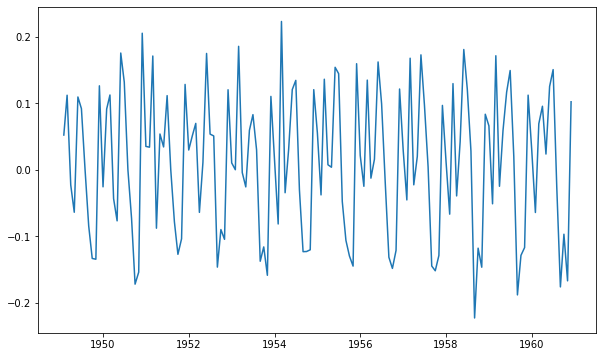

In [19]:
#shifting the dataset
dataset_log_shift = dataset_log - dataset_log.shift()
plt.plot(dataset_log_shift)
plt.show()

In [20]:
#doing plotting withseasonal model
decomposition = seasonal_decompose(dataset_log)
trend         = decomposition.trend
seasonal      = decomposition.seasonal
residual      = decomposition.resid

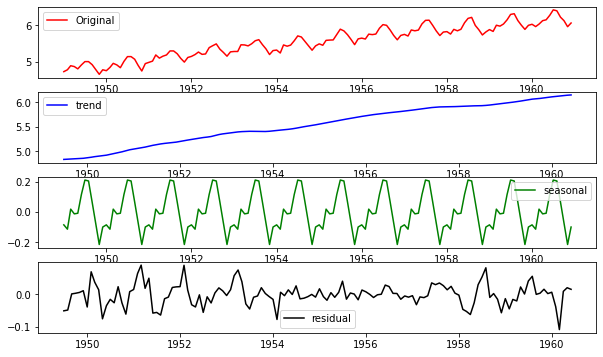

In [21]:
#plotting the objects obtained in above cell
plt.subplot(411)
plt.plot(dataset_log,color='red',label='Original')
plt.legend()
plt.subplot(412)
plt.plot(trend,color='blue',label='trend')
plt.legend()
plt.subplot(413)
plt.plot(seasonal,color='green',label='seasonal')
plt.legend()
plt.subplot(414)
plt.plot(residual,color='black',label='residual')
plt.legend()
plt.show()

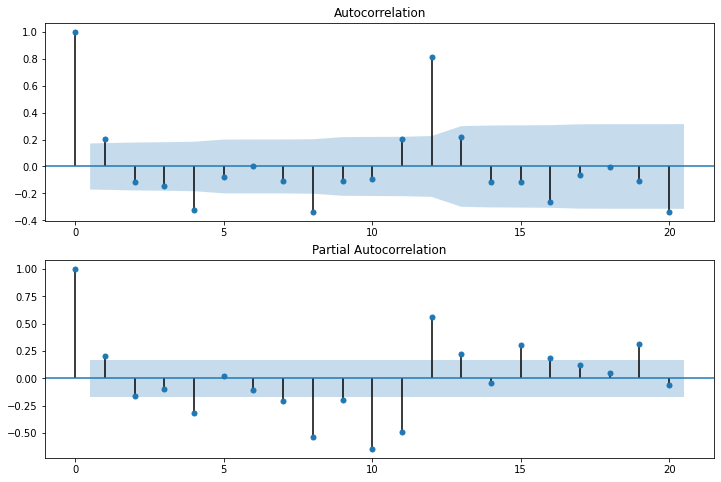

In [23]:
#plotting the acf for p (auto regressive) and pcf for q (moving average)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(dataset_log_shift['Passengers'].iloc[13:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(dataset_log_shift['Passengers'].iloc[13:],lags=20,ax=ax2)

In [24]:
#values obtained through above graphs
p = 2
d = 1
q = 2

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


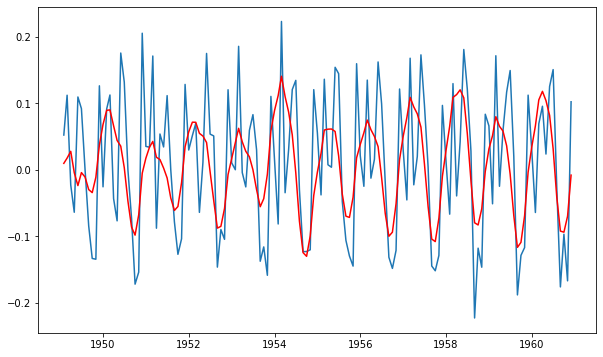

In [31]:
#doing modeling now
model     = ARIMA(dataset_log,order = (p,d,q))
result_AR = model.fit(disp=-1)
plt.plot(dataset_log_shift)
plt.plot(result_AR.fittedvalues,color='red')
plt.show()

In [42]:
#calculating the rss value to undertand the error in the model - this should be as low as possible
rss = sum((result_AR.fittedvalues-dataset_log_shift['Passengers'][1:])**2)
rss = round(rss,3)
print('RSS Value : ',rss)

RSS Value :  1.029


In [26]:
#view as data frame
predicted_arima = pd.Series(result_AR.fittedvalues,copy=True)
predicted_arima.head(6)

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
1949-07-01   -0.004347
dtype: float64

In [27]:
#converting it to cumulative
predicted_arima_diff_cumsum = predicted_arima.cumsum()
predicted_arima_diff_cumsum.head(6)

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
1949-07-01    0.021984
dtype: float64

In [45]:
#finally predicting for the fitted values
predicted_arima_log = pd.Series(dataset_log['Passengers'].iloc[0],index=dataset_log.index)
predicted_arima_log = predicted_arima_log.add(predicted_arima_diff_cumsum,fill_value=0)
predicted_arima_log.head(6)

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
1949-06-01    4.744830
dtype: float64

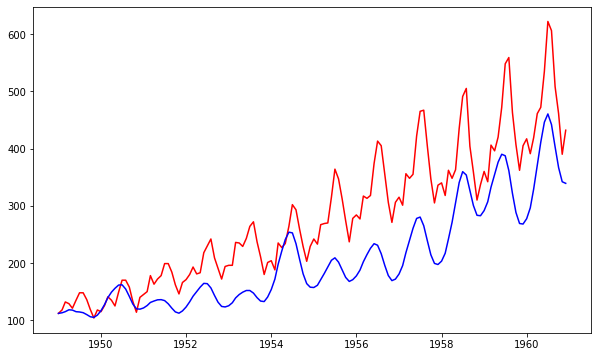

In [46]:
#taking log of the values we have got to scale it back to decimal
predicted_arima_final = np.exp(predicted_arima_log)
plt.plot(dataset,color='red')
plt.plot(predicted_arima_final,color='blue')
plt.show()

In [47]:
#publishing the dataset
dataset_log

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


(array([6.09553389, 6.15281399, 6.22442963, 6.29241102, 6.3416472 ,
       6.36359368, 6.35784693, 6.3313931 , 6.29597544, 6.26447715,
       6.24738324, 6.25025169]), array([0.08384711, 0.10749461, 0.11568694, 0.11702774, 0.11703496,
       0.11744017, 0.11762249, 0.11778712, 0.12024162, 0.12736043,
       0.13870961, 0.15118794]), array([[5.93119657, 6.25987121],
       [5.94212842, 6.36349956],
       [5.9976874 , 6.45117187],
       [6.06304087, 6.52178118],
       [6.11226291, 6.5710315 ],
       [6.13341519, 6.59377218],
       [6.12731109, 6.58838277],
       [6.10053458, 6.56225162],
       [6.06030619, 6.53164469],
       [6.0148553 , 6.514099  ],
       [5.97551741, 6.51924908],
       [5.95392877, 6.54657461]]))


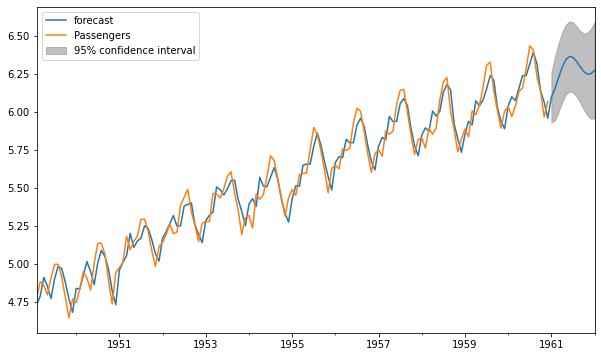

In [49]:
#predicting for future dates
result_AR.plot_predict(1,156)
future_values_1_year = result_AR.forecast(steps=12)
print(future_values_1_year)

###***-- End of Notebook --***